In [25]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from scipy.stats import gaussian_kde
import seaborn as sn
import pandas as pd

In [2]:
from precision_recall import plot_precision, plot_recall

Loading dataset

In [3]:
iris = datasets.load_iris().data
iris_features = iris[:, [0, 1, 2]]
iris_values = iris[:, 3]
features_train, features_test, values_train, values_test = train_test_split(iris_features, iris_values, test_size=0.33)

Строим срез (petal length, petal width). Просматривается линейная зависимость

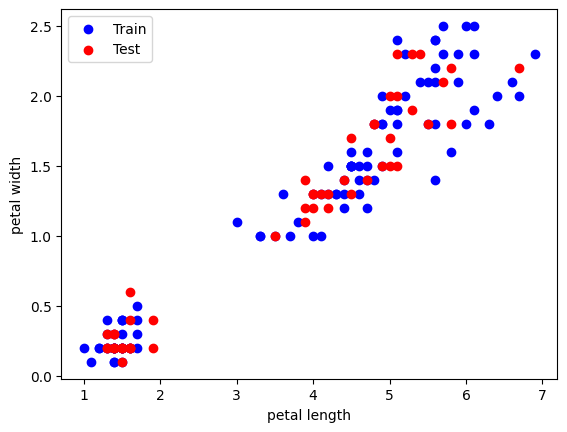

In [4]:
plt.scatter(features_train[:, 2], values_train, c='b')
plt.scatter(features_test[:, 2],  values_test,  c='r')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(["Train", "Test"])

Обучаем линейную модель. petal width = f(sepal length, sepal width, petal length).

In [5]:
reg = LinearRegression().fit(features_train, values_train)
reg.score(features_test, values_test)

0.9387460913936391

Строим срез (petal length, petal width) c учётом предсказанных значений

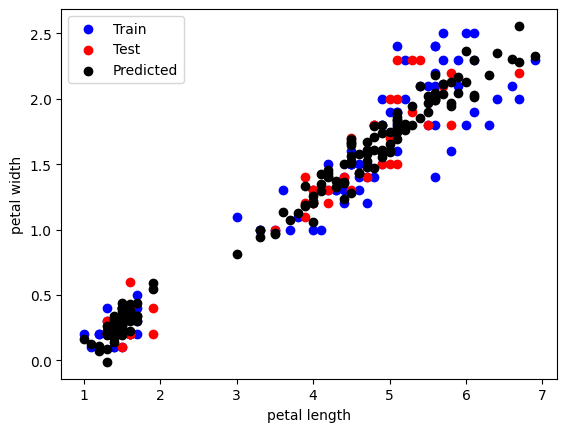

In [6]:
plt.scatter(features_train[:, 2], values_train, c='b')
plt.scatter(features_test[:, 2],  values_test,  c='r')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(iris_features[:, 2], reg.predict(iris_features), c='k')
plt.legend(["Train", "Test", "Predicted"])

Тестируем функции plot_precision, plot_recall на полученной модели

In [7]:
y_act = iris_values
y_pred = reg.predict(iris_features)

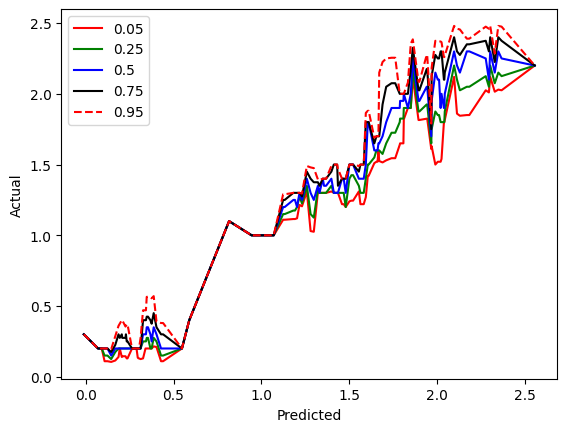

In [8]:
plot_precision(y_pred, y_act, delta=0.15, delta_mode='relative', plt_mode='raw')

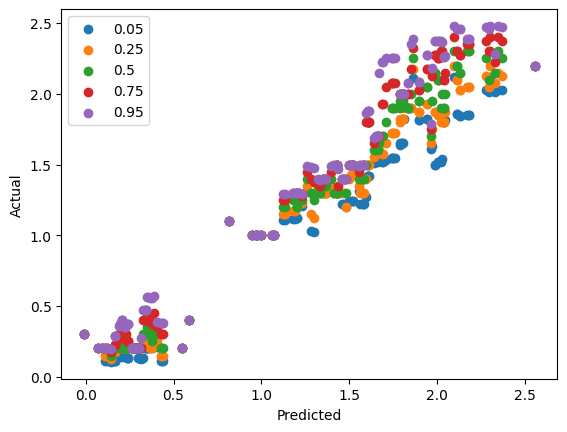

In [9]:
plot_precision(y_pred, y_act, delta=0.15, delta_mode='relative', plt_mode='raw', plotter_mode='scatter')

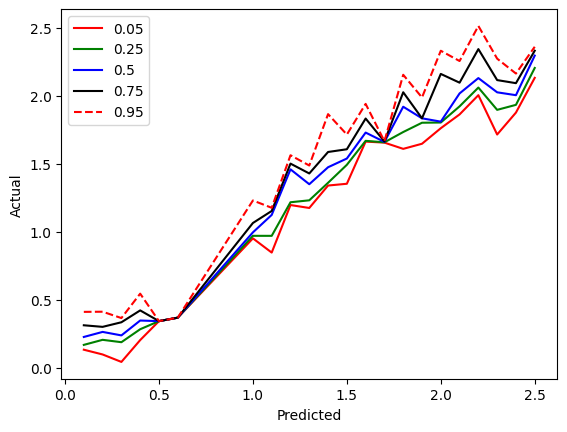

In [10]:
plot_recall(y_pred, y_act, delta=0.15, delta_mode='relative', plt_mode='raw')

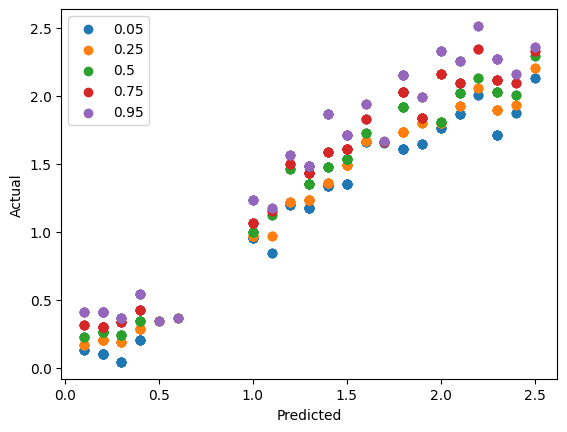

In [11]:
plot_recall(y_pred, y_act, delta=0.15, delta_mode='relative', plt_mode='raw', plotter_mode='scatter')

In [15]:
kde = gaussian_kde(np.vstack((y_pred, y_act)))

In [32]:
df = pd.DataFrame(np.vstack((y_pred, y_act)).transpose(), columns=["pred", "act"])
df

,pred,act
0,0.237839,0.2
1,0.144859,0.2
2,0.193629,0.2
3,0.296187,0.2
4,0.289021,0.2
...,...,...
145,1.762460,2.3
146,1.608844,1.9
147,1.809012,2.0
148,2.097652,2.3


<AxesSubplot: xlabel='pred', ylabel='act'>

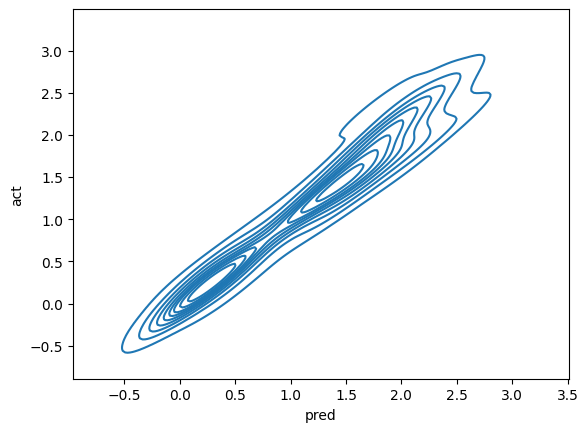

In [35]:
sn.kdeplot(data=df, x="pred", y="act")